# Численное решение дифференциальных уравнений

## 1. Введение

Найти решение дифференциального уравнения $$\frac{dy}{dt}=f(t,y)$$ с начальными условиями $(t_0,y_0)$, т.е. известно значение $y(t_0)=y_0$.

При использовании численных методов значения непрерывной функции $y(t)$, являющейся решением уравнения,вычисляются на конечном **дискретном множестве** значений аргумента: $t_0<t_1<t_2…<T$.

Приближенное решение в моменты $t_i$ ищется в виде последовательности векторов $y_1$, $y_2$, ... $y_k$, приближенно равных векторам $y(t_1)$, $y(t_2)$, …, $y(t_k)$,…, определяемым точным решением $y(t)$.

Расстояние между соседними временными точками называется **шагом интегрирования** $h$: $$h = t_{k+1} - t_k$$ Шаг может быть задан заранее (интегрирование с постоянным шагом) или может меняться в ходе вычислений. Чаще всего $$t_k=t_0+kh$$  где $k=0,1,...T$, $h=\frac{T-t_0}{N}$

Точка $y_{k+1}$, определяемая на (k+1)-й итерации, может вычисляться явно:

$$y_{k+1}=F(t_k, t_{k-1}, t_{k-2}, ..., y_k, y_{k-1}, y_{k-2},...)$$

где $F()$ – некоторая функция, зависящая от конкретного алгоритма (кроме последней рассчитанной точки $(t_k, y_k)$ используются еще (m-1) предыдущих точек, или неявно

$$y_{k+1}=F(t_{k+1},t_k, t_{k-1}, t_{k-2}, ..., y_{k+1},y_k, y_{k-1}, y_{k-2},...)$$

где искомая величина $y_{k+1}$ входит одновременно и в левую и в правую часть. Cоответственно численные методы делятся на **явные** и **неявные**.

Численные методы делятся также на **одношаговые** и **m-шаговые**. В одношаговых методах для расчета точки $(t_{k+1}, y_{k+1})$ требуется информация только о последней рассчитанной точке $(t_k, y_k)$. В m-шаговых методах для нахождения точки $(t_{k+1}, y_{k+1})$ требуется информация о m предыдущих точках.

## 1.2 Метод Эйлера

Метод Эйлера - наиболее простой метод, явный, одношаговый. Полученное с помощью него решение в точке $t_{k+1}$
совпадает с разложением $y(t)$ в окрестности этой точки в ряд Тейлора до членов порядка $h$.

Расчетная формула выглядит так: $$y_{k+1} = y_k + h f(t_k, y_k)$$

### Пример

Рассмотрим дифференциальное уравнение $$\frac{dy}{dt}=y(1-y)$$ Найдем решение на интервале $t=[0, 25]$, при начальном условии $y_0=10^{-5}$

In [1]:
T  = 25              # конечное время
y₀ = 1e-5            # начальное значение
h  = 0.1             # шаг интегрирования
N  = Int64(T/h) + 1  # число точек дискретизации

f(y) = y * (1 - y)   # заданная функция

t = collect(0:h:T);  # вектор временных точек t = [t₀, t₁, t₂,...T]

Аналитическое решение имеет вид

$$y(t)=\frac{1}{1-Ce^{-t}}$$

где $C = 1-\frac{1}{y_0}$

In [2]:
C  = 1 - 1e5
yₐ = 1 ./ (1 .- C * exp.(-t));

Численное решение 

In [3]:
yₑ = zeros(N)        # вектор расчетных значений y = [y₀, y₁, y₂,..]

yₑ[1] = y₀
for k in 1:N-1
    yₑ[k+1] = yₑ[k] + h * f(yₑ[k])
end

Для построения графика функции $y(t)$ используем пакет [Plots.jl](https://docs.juliaplots.org/stable/)
``` 
plot(y) - построить линейный график y(x), где x=[1,2,3...]
plot(x,y) - построить линейный график y(x)
plot!(x,z) - обновить график, добавив z(x)
plot(x,y, arg1=value1, arg2=value, ...) - построить y(x) с дополнительными опциями
```
Некоторые дополнительные аргументы:
```
title - название графика
xlabel - подпись по оси x
ylabel - подпись по оси y
label - название кривой
linecolor - цвет линии
linestyle - стиль линии
markerline - цвет точки
markershape - стиль точки
```

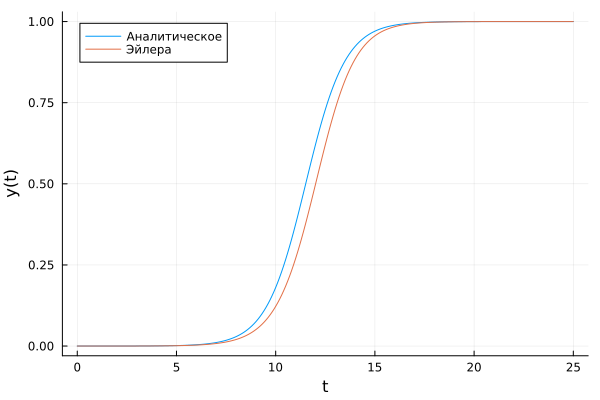

In [4]:
using Plots

plot( t, yₐ, label = "Аналитическое")
plot!(t, yₑ, label = "Эйлера")
plot!(xlabel = "t", ylabel = "y(t)")

Отклонение от истинного решения обусловлено высокой погрешностью метода. Для получения более точного решения требуется уменьшать шаг интегрирования, что приводит к увеличению объема вычисления.

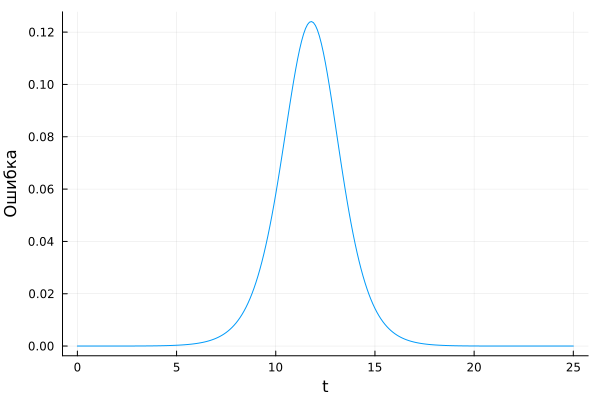

In [5]:
# График ошибки
plot(t, abs.(yₑ - yₐ), label = "", xlabel = "t", ylabel = "Ошибка") 

## 1.3 Метод Рунге-Кутты
Чаще на практике применяется более точный метод, метод Рунге-Кутты.

В классическом исполнении расчетная формула выглядит так:

$$a_1=f(t_k,y_k) $$
$$a_2 = f(t_k+h/2, y_k+ha_1/2) $$
$$a_3=f(t_k+h/2, y_k+ha2/2) $$
$$a_4=f(t_k+h, y_k+ha3) $$

$$y_{k+1}=y_k+\frac{h}{6}(a_1+2a_2+2a_3+a_4)$$

In [6]:
yᵣₖ = zeros(N)

yᵣₖ[1] = y₀
for k in 1:N-1
    a₁ = f(yᵣₖ[k])
    a₂ = f(yᵣₖ[k] + h * a₁/2)
    a₃ = f(yᵣₖ[k] + h * a₂/2)
    a₄ = f(yᵣₖ[k] + h * a₃)
    yᵣₖ[k+1] = yᵣₖ[k] + h/6 * (a₁ + 2a₂ + 2a₃ + a₄)
end

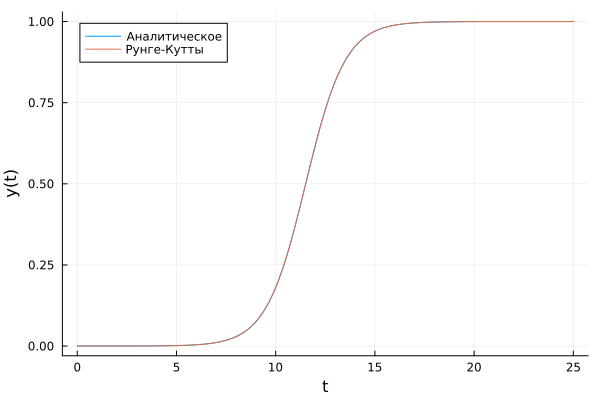

In [7]:
plot( t, yₐ,  label = "Аналитическое")
plot!(t, yᵣₖ, label = "Рунге-Кутты")
plot!(xlabel = "t", ylabel = "y(t)")

Сравнение погрешности методов

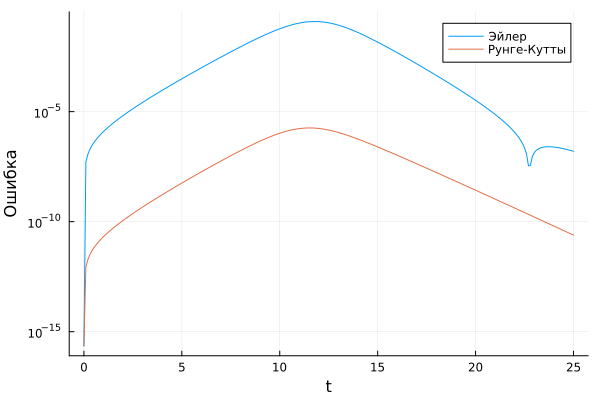

In [9]:
yₑ[1]  += eps()      # для исключения log10(0) добавляем малую константу
yᵣₖ[1] += eps()

plot( t, abs.(yₑ - yₐ),  label = "Эйлер")  
plot!(t, abs.(yᵣₖ - yₐ), label = "Рунге-Кутты")  
plot!(xlabel = "t", ylabel = "Ошибка", yaxis = :log10)

In [ ]:
## 1.4 Метод Рунге-Кутты Мерсона 

В этой модификации метода присутствует механизм автоматического изменения шага, основанный на
контроле точности вычислений. Схема Мерсона (см. [Мудров А.Е. Численные методы для ПЭВМ на языках Бейсик, Фортран и Паскаль. - Томск: МП "РАСКО", 1991](https://scask.ru/n_book_edm.php?id=39)):


$$a_1 = hf(t_k, y_k)/3 $$
$$a_2 = hf(t_k+h/3, y_k + a_1)/3 $$
$$a_3 = h f(t_k+h/3, y_k + (a_1 +  a_2)/2) $$
$$a_4 = a_1 + 4h f(t_k +h/2, y_k + 3/8 (a_1+ a_3))/3 $$
$$a_5 = h f(t_k+h, y_k + 3/2(-a₃ + a₄))/3$$

$$y_{k+1} = y_k + 1/2 (a_4 + a_5) $$
$$t_{k+1} = t_k+h$$


На каждом шаге находится оценка локальной ошибки $\Delta = \frac{1}{10}(-3a_3+2a_4-a_5)$. Если $|\Delta| \geq \epsilon$, где $\epsilon$ - заданная допустимая точность, то шаг $h$ уменьшается в 2 раза и вычисления по схеме повторяются с точки $(t_k, y_k)$. Если $|\Delta| \leq \epsilon/32$, то шаг $h$ можно увеличить в 2 раза. 